# Complex Graphics with Seaborn

Throughout this course, we've seen how to use our basic Python skills to create sophisticated data graphics. Some nice developers have created the the Seaborn package, which can automate some of the work for us. Using Seaborn, we can create familiar plots more easily, and create new ones as well. 

Both base Matplotlib and Seaborn graphics are welcome on your projects. Please keep in mind that you must be ready to explain every facet of a plot. So, if you use a fancy Seaborn function to create a complicated visualization and then discuss only some of its facets, you may lose points for showing unnecessary information. 

In [3]:
import pandas as pd

In [27]:
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Seaborn builds on the foundation of Matplotlib. It includes several simple commands to make very complex visualizations, including ones which would normally require a `for`-loop or use of `apply`.  The cost of all this power is that it is sometimes more difficult to exercise fine-grained control over the details. 

One of the main differences between Seaborn and Matplotlib is that Seaborn accepts the names of dataframe columns for many arguments. 

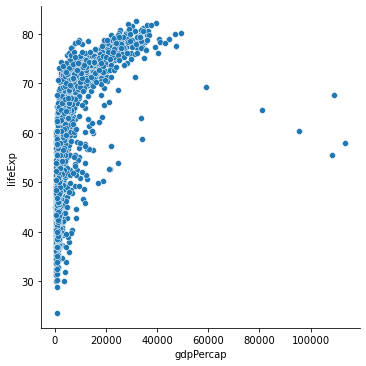

In [6]:
import seaborn as sns 

sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp")
#differences between seaborn and matplotlib
#1 automatically adds labels
#the dots have little outlines around them to make them easier to see
#seaborn takes the data  frame and then the colummn names as as inputs
#whereas matplotlib you had to say ax.scatter() with things like gapminder["lifeEx[]"]
#seaborn is more directly integrated with pandas

Looks good. We already got labels, and there is a nice outline around the points, but __what is a facetgrid__?

Now let's color the data by continent. (How would we have done this with Matplotlib?)

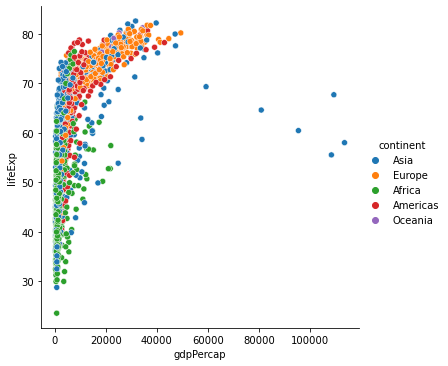

In [7]:
# we are eventually going to put it on a log scale
# but first, color code
sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")


array([[<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>]], dtype=object)

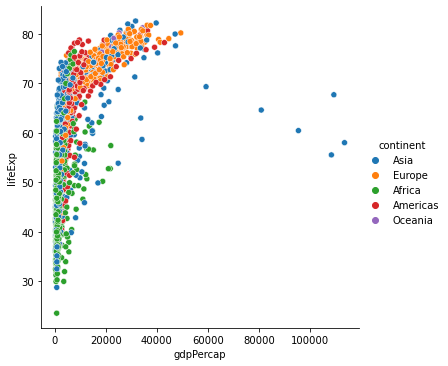

In [9]:
#now lets try to put the x-axis on a log scale
#cant just use ax.semilogx() right away
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")


#fgrid has an axes attribute
fgrid.axes
#axex is an array of of grids

#fgrid.axes is an array of axes, so we can now use ax.semilogx() if we set ax to the write element of the array

[]

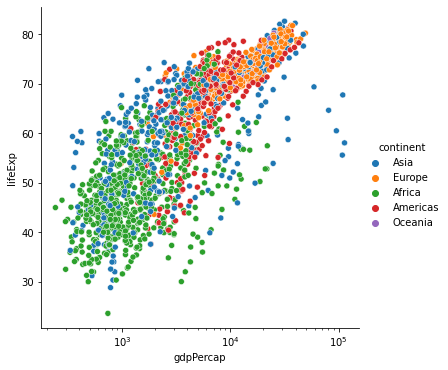

In [10]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")

ax=fgrid.axes[0][0]

ax.semilogx()

Add transparancey

[]

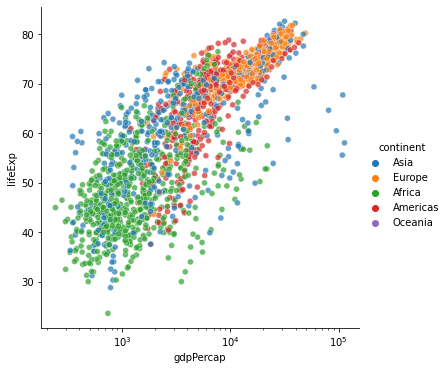

In [11]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7)

ax=fgrid.axes[0][0]

ax.semilogx()

## Now, let's group by continents

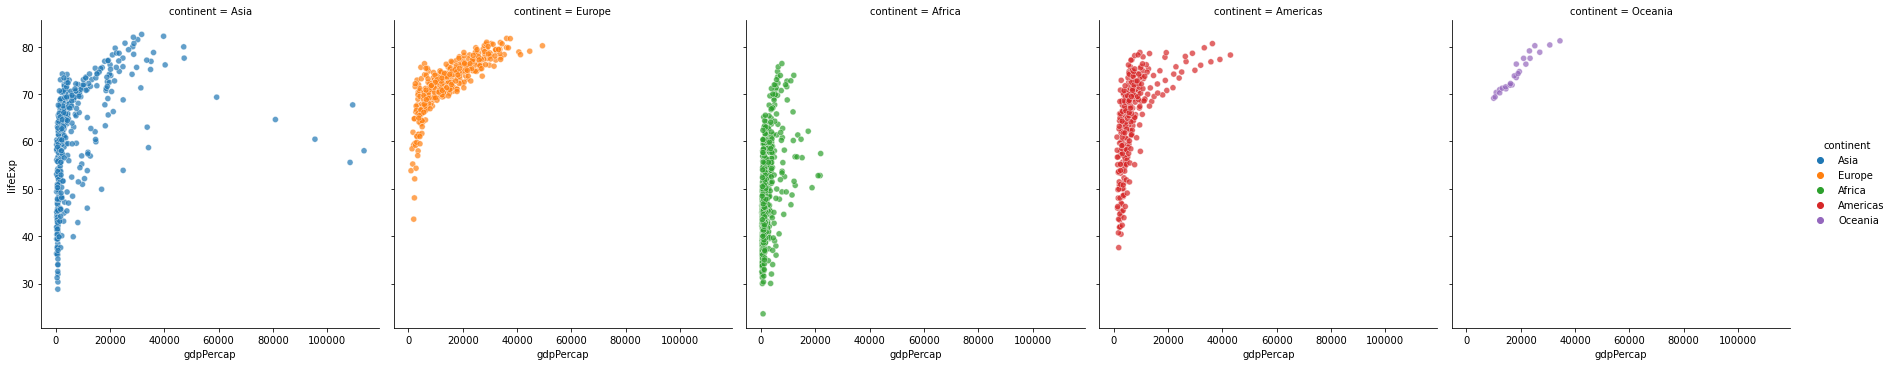

In [12]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7,col="continent")


We lost our log?

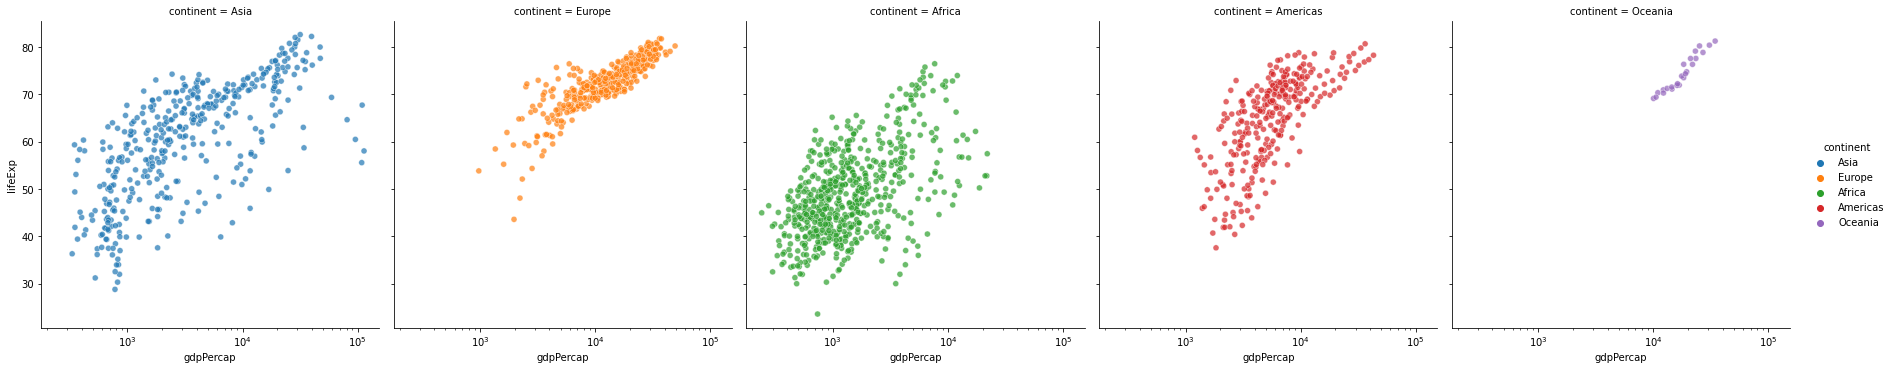

In [14]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7,col="continent")

for ax in fgrid.axes.flatten():
    ax.semilogx()


Two rows of plots

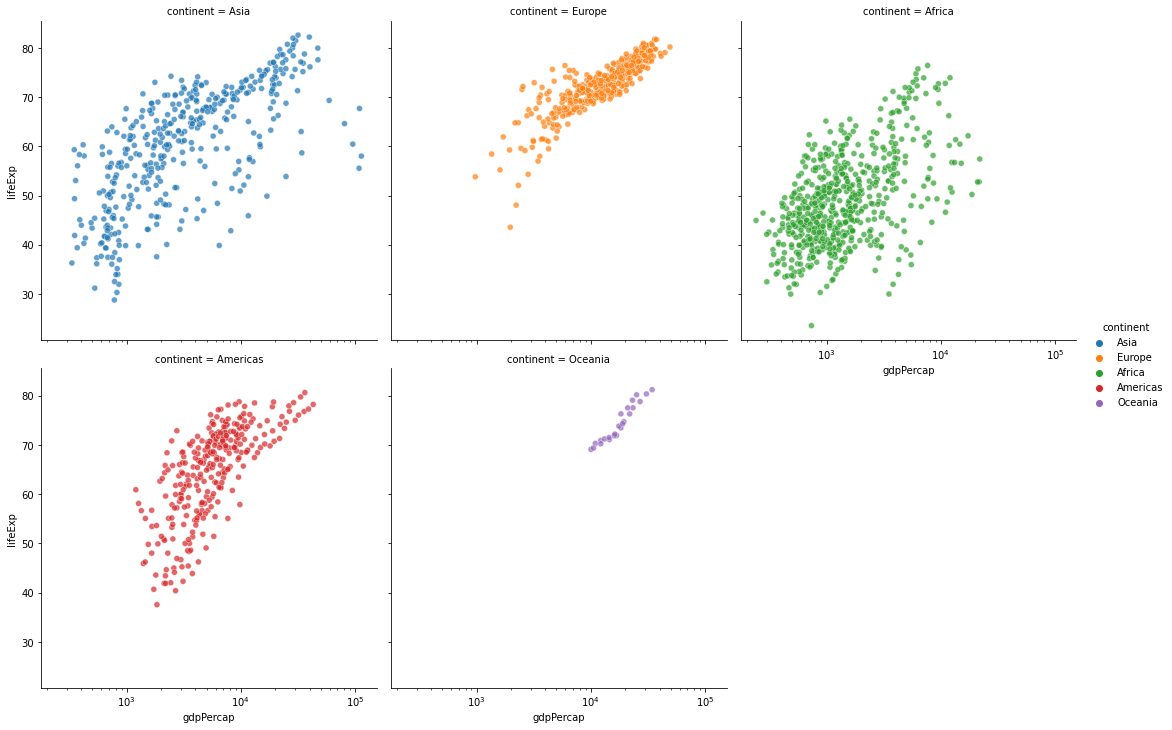

In [15]:
fgrid=sns.relplot(data=gapminder,
                  x="gdpPercap",
                  y="lifeExp",
                  hue="continent",
                  alpha=.7,
                  col="continent",
                 col_wrap=3)

for ax in fgrid.axes.flatten():
    ax.semilogx()

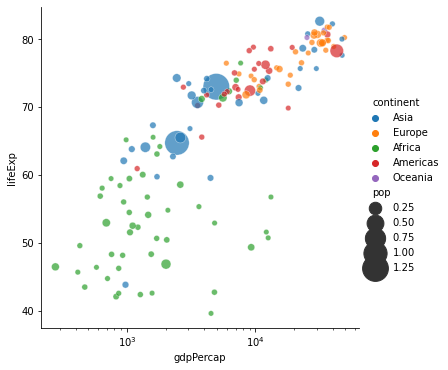

In [18]:
#some more fancy stuff
sub_gapminder=gapminder[gapminder["year"]==2007]

fgrid=sns.relplot(data=sub_gapminder,
                  x="gdpPercap",
                  y="lifeExp",
                  hue="continent",
                  alpha=.7,
                  size="pop",
                  sizes=(29,700)
                  )

for ax in fgrid.axes.flatten():
    ax.semilogx()

## Bar Charts

Can put seaborn plots inside of normal matplot lib figures


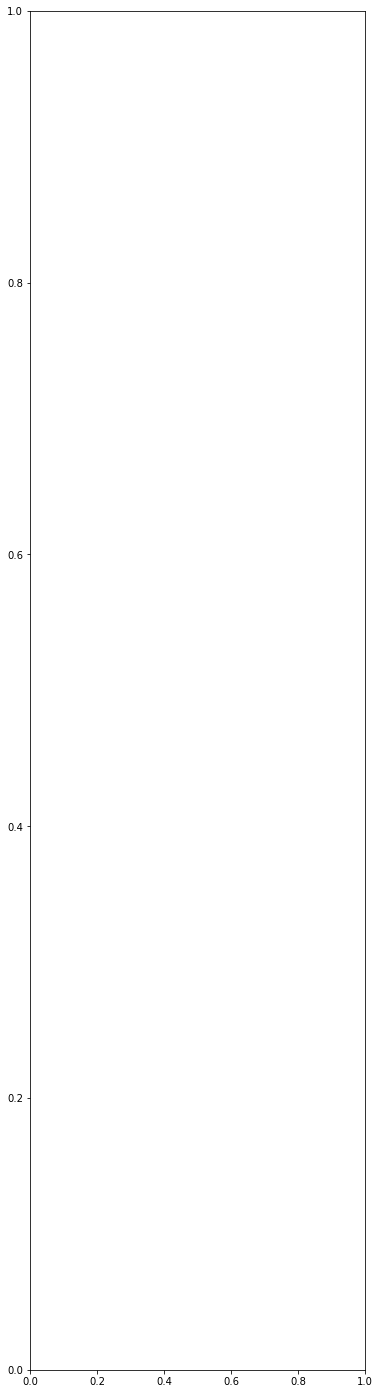

In [19]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(6,25))

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

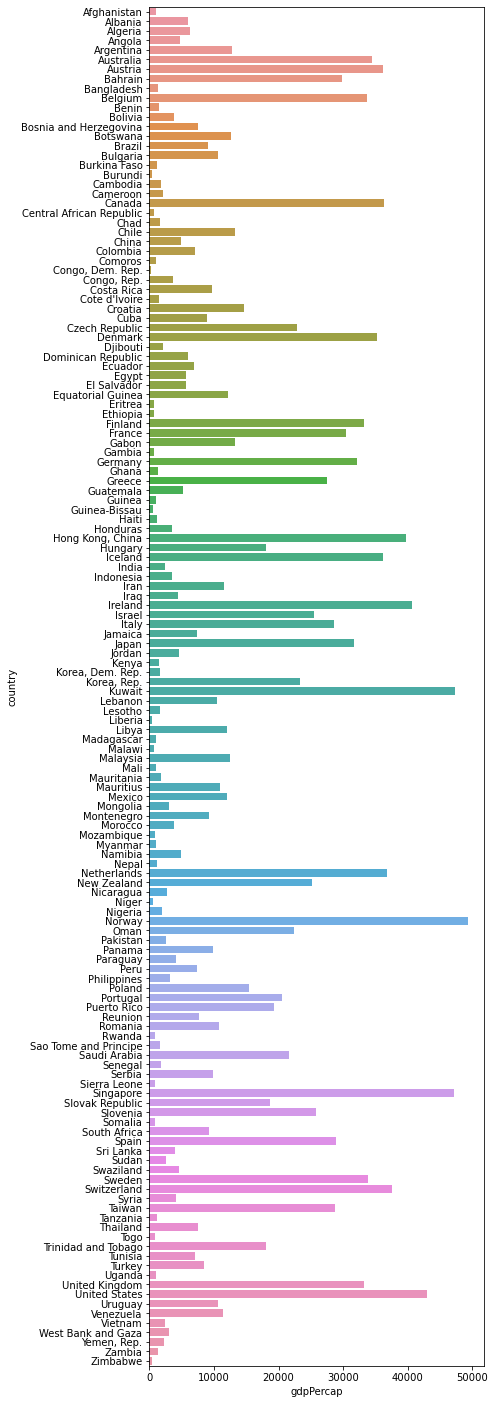

In [20]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder
sns.barplot(data=df,x="gdpPercap",y="country")

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

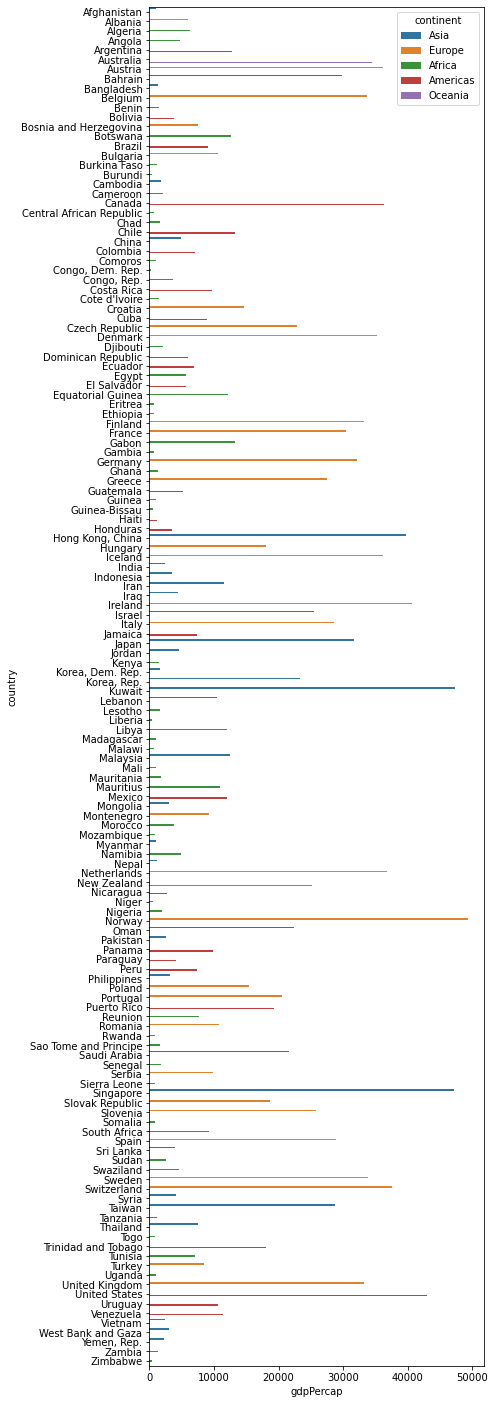

In [21]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder
sns.barplot(data=df,x="gdpPercap",y="country",hue="continent")

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

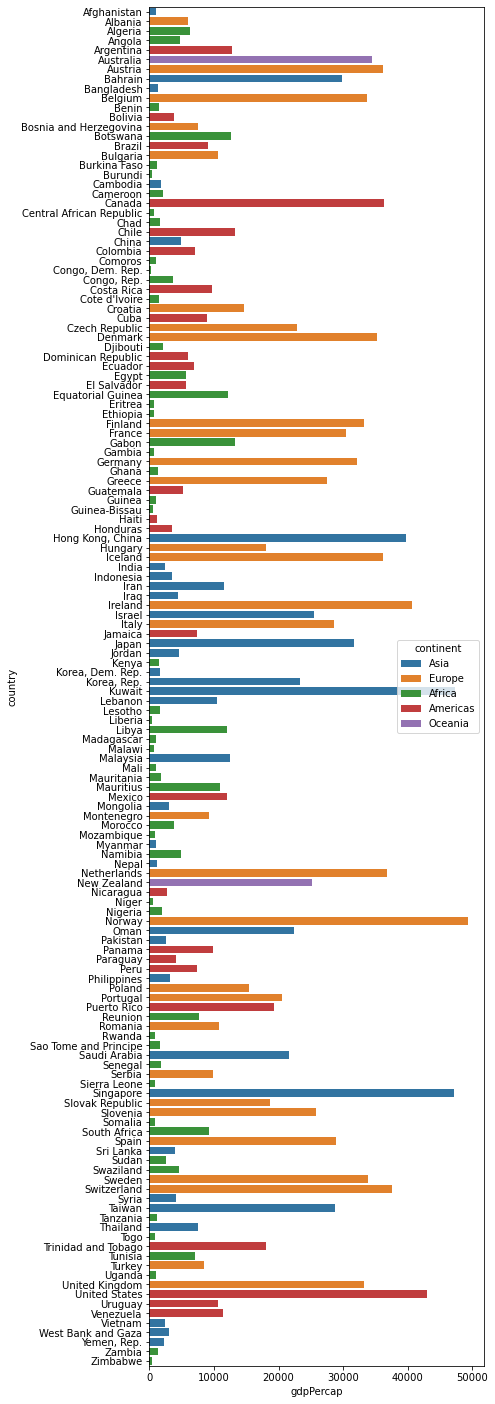

In [22]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder
sns.barplot(data=df,x="gdpPercap",y="country",hue="continent",dodge=False)

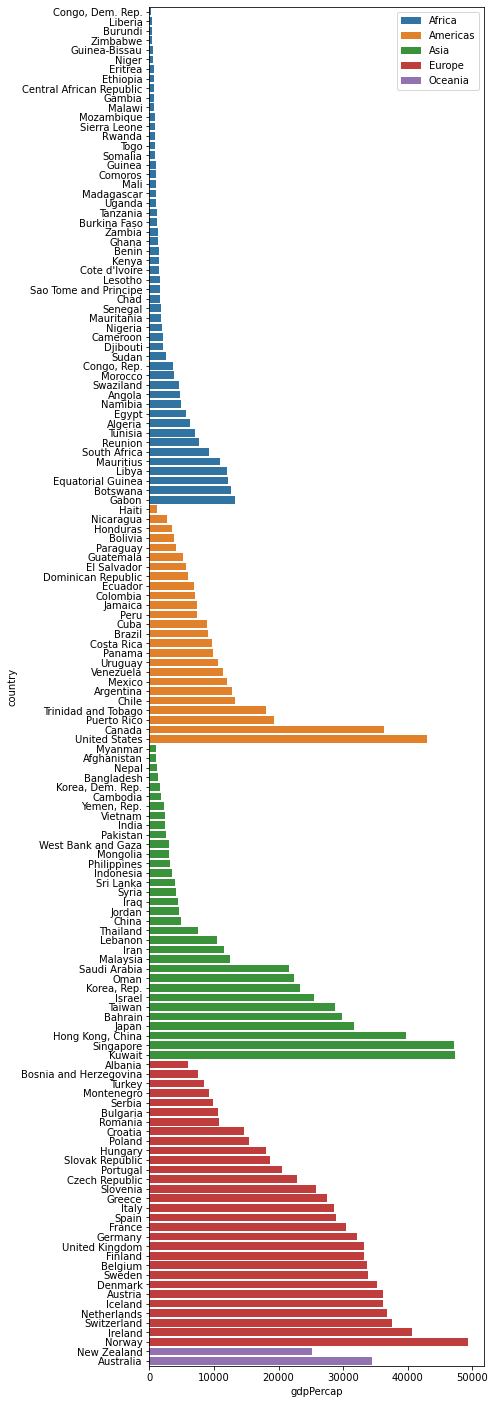

In [25]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder
df=df.sort_values(["continent","gdpPercap"],ascending=True)
sns.barplot(data=df,x="gdpPercap",y="country",hue="continent",dodge=False)
plt.legend(loc="upper right")

# Pairplots

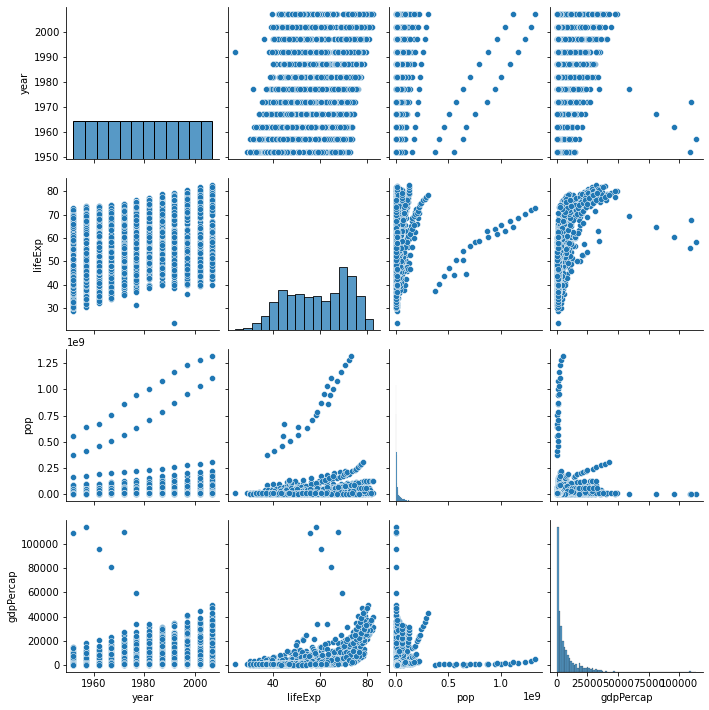

In [28]:
sns.pairplot(gapminder)

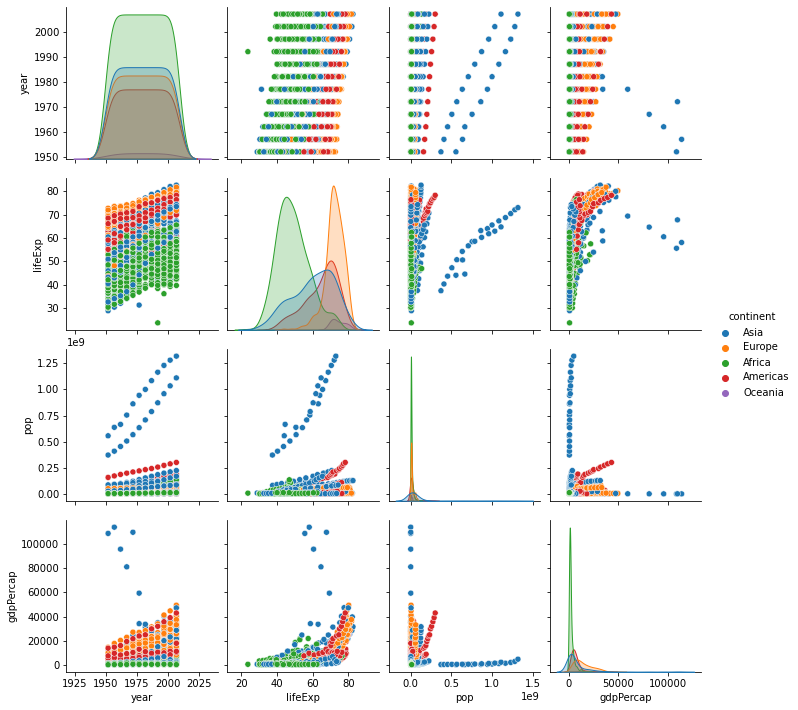

In [29]:
sns.pairplot(gapminder,hue="continent")

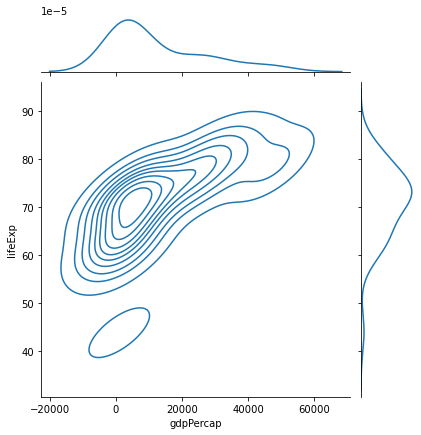

In [32]:
#joint plots
ix=(gapminder["continent"]=="Asia") & (gapminder["year"]==2007)
subset=gapminder[ix]

sns.jointplot(data=subset,x="gdpPercap",y="lifeExp",kind="kde")


Many more examples available here https://seaborn.pydata.org/examples/index.html

In [ ]:
#two surveys one on myucla one on CCLE (EXTRA CREDIT)
#i cant see who filled out the myucla survey, so the rule is that if 2/3 of the class fills it out
#the whole class gets extra credit

#for ccle one it is simpler, you fill it out, you get extra credit

#this is particularly important for this class vecause this version of pic16A is new
#so we are still trying to figure out how to make it better
#in particular, this is the first summer version of it

#also oon the extra credit front, their an essay you can write on algorithms and society as described in the syllabus
#i just posted it on ccle today
#the deadline is sunday the 15th at 1159PM
#videos for wednesday and thursdays live lecture are going to focus on algorithmic  bias


